In [252]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import json
from sklearn import datasets
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [253]:
jakes_data_csv = "data.csv"
data = pd.read_csv(jakes_data_csv)
data

,title,tagline,responses,tech,is_winner,like_count,members,photo_url,has_video,comment_count
0,Connect,To help people who are not good at initiating ...,"[1636, 'Our inspiration comes from finding tho...","['android', 'android-studio', 'java', 'mapbox'...",False,0,"['ihm5020', 'williamkucds', 'bchu7796']",NaN,False,0
1,Safeify,Help stop fires and report public infrastructu...,"[1245, 'After seeing the fires in Northern Cal...","['swift', 'google', 'apple', 'ios']",False,0,['jakechasan'],https://challengepost-s3-challengepost.netdna-...,False,0
2,GetOffTheRoad,An API and notification service for forecastin...,"[2706, 'Reduced visibility, rain, and snow are...","['accuweather', 'twilio', 'python', 'flask', '...",False,0,"['cjgriscom', 'vennilapugazhenthi']",https://challengepost-s3-challengepost.netdna-...,False,0
3,Offensive Language Convolution Neural Network,Although our network only represented cases of...,"[1340, ' ', ' ', ' ', ' ', ' ', ' ', ' ']","['we-trained-a-neural-network-using-4', 'pytho...",False,0,['achung3'],https://challengepost-s3-challengepost.netdna-...,True,0
4,NittanyChain,Securing our school currency with cutting-edge...,"[3047, ' ', 'NittanyChain secures all transact...","['intellij-idea', 'netbeans', 'java', 'visual-...",False,1,"['wa1mart', 'rparmar01', 'nimeshsilva']",NaN,False,0
5,CITIZENS' REPORT,Our idea involves creating a project where peo...,"[1953, 'Some of our inspirations include our l...","['html', 'api', 'twilio', 'amazon-web-services...",False,0,"['ledxi', 'stevenrs00', 'thefreshprince831', '...",NaN,False,0
6,PillTime,Do you have elderly family members? Do they fo...,"[819, 'This was inspired by the reminders that...","['alexa', 'node.js', 'google-cloud']",False,0,['cxd00'],NaN,False,0
7,Insta Care,Instant Care When You Need It,"[1351, ""It is known that many people don't rec...","['html', 'css', 'google-cloud', 'uipath', 'mon...",False,0,"['abhinavmamidipaka', 'annikaiyengar']",NaN,False,0
8,Sage,Peer-based personalized career education at a ...,"[935, 'We want to make career advice more acce...","['html', 'css', 'react']",False,0,['yanhann10'],https://challengepost-s3-challengepost.netdna-...,True,0
9,Heads Up Disaster,Predicting disasters days prior rather than th...,"[2658, 'The Textron and JP Morgan challenges i...","['python', 'javascript', 'accuweather-api', 'g...",False,0,"['jxj5466', 'spearman666', 'lizhu912', 'nikhil...",https://challengepost-s3-challengepost.netdna-...,False,0


In [254]:
lists = []
master = []
counter = -1
for i  in data['tech']:
    counter += 1
    '''
    if str(data['is_winner'][counter]) == 'True':
        continue
    '''
    try:
        lists.append(eval(i))
    except:
        
        continue
    
for l in lists:
    for tech in l:
        master.append(tech)
#print(master)

techs = {}
for tech in master:
    if tech not in techs: 
        techs[tech] = 1
    else:
        techs[tech] += 1

good_techs = {}
good_keys = []
for key in techs:
    if techs[key] > 20: #change as the data grows
        good_techs[key] = techs[key]
        good_keys.append(key)
good_techs

{'azure': 23,
 'css': 87,
 'css3': 25,
 'firebase': 32,
 'flask': 42,
 'google-cloud': 25,
 'google-maps': 23,
 'html': 102,
 'html5': 44,
 'java': 69,
 'javascript': 168,
 'mongodb': 29,
 'node.js': 62,
 'python': 177,
 'react': 62,
 'twilio': 24}

([<matplotlib.axis.XTick at 0x16ebf83fac8>,
 <a list of 16 Text xticklabel objects>)

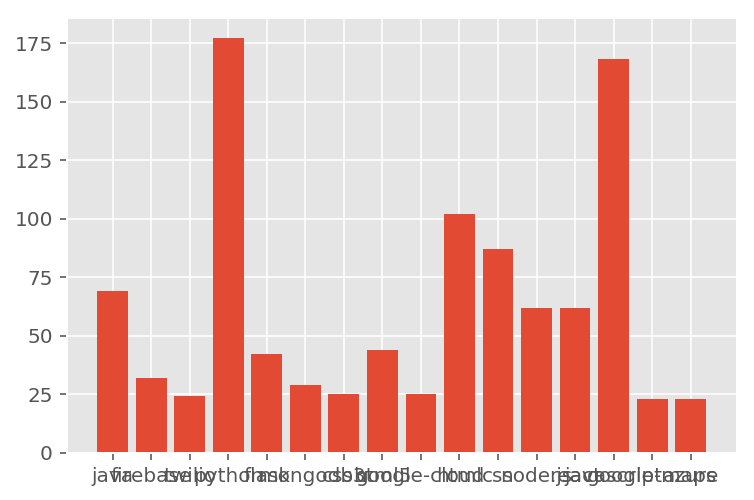

In [255]:
plt.bar(range(len(good_techs)), list(good_techs.values()), align='center')
plt.xticks(range(len(good_techs)), list(good_techs.keys()))

In [256]:
good_keys.append('num_technologies')
good_keys.append('photo_url')
good_keys.append('num_collaborators')
good_keys.append('length')
good_keys.append('is_winner')

reduction = 5
good_keys

['java',
 'firebase',
 'twilio',
 'python',
 'flask',
 'mongodb',
 'css3',
 'html5',
 'google-cloud',
 'html',
 'css',
 'node.js',
 'react',
 'javascript',
 'google-maps',
 'azure',
 'num_technologies',
 'photo_url',
 'num_collaborators',
 'length',
 'is_winner']

In [257]:
counter = -1
rows = []
for tech_list in data['tech']:
    row = []
    counter += 1
    num_technologies = 0
    try:
        tech_list = eval(tech_list)      #pop technologies
        num_technologies = len(tech_list)
        for i,key in enumerate(good_keys):
            if i == len(good_keys) - reduction:
                break
            if key in tech_list:
                row.append(1)
            else:
                row.append(0)
        
    except:
        for i in range(len(good_keys) - reduction):
            row.append(0)
      
    row.append(num_technologies)

    if type(data['photo_url'][counter]) == str: #photo
        row.append(1)
    else:
        row.append(0)
    
    try:
        row.append(len(eval(data['members'][counter])))
    except:
        print("ERROR WITH member DATA")
        continue
        
    try:
        l = eval(data['responses'][counter])
        row.append(l[0])
    except:
        print("ERROR WITH RESPONSE DATA")
        continue
    
            
    if str(data['is_winner'][counter]) == 'False':    #pop winner or not
        row.append(0)
    else:
        row.append(1)
    #print("row: ", counter, " ",row)  
    rows.append(row)
        
#print(rows) 
df = pd.DataFrame(rows, columns = good_keys)
df

,java,firebase,twilio,python,flask,mongodb,css3,html5,google-cloud,html,...,node.js,react,javascript,google-maps,azure,num_technologies,photo_url,num_collaborators,length,is_winner
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,3,1636,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,1,1,1245,0
2,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,5,1,2,2706,0
3,0,1,0,1,0,0,1,1,1,0,...,0,0,0,0,0,10,1,1,1340,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,3,3047,0
5,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,8,0,5,1953,0
6,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,3,0,1,819,0
7,0,0,0,1,1,1,0,0,1,1,...,1,1,1,0,0,11,0,2,1351,0
8,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,3,1,1,935,0
9,0,0,1,1,1,0,1,1,0,0,...,0,1,1,1,0,15,1,4,2658,0


In [258]:
inputs = []
for i,key in enumerate(good_keys):
    if i == len(good_keys)-1:
        break
    inputs.append(key)
    
target = 'is_winner'

In [259]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)

In [260]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
k = 5
model = neighbors.KNeighborsClassifier(k)
model.fit(train[inputs], train[target].ravel())
predicted = model.predict(test[inputs])
print(predicted)

model.score(test[inputs], test[target])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


0.94

In [261]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, df[inputs], df[target],cv = 5)
print("Mean: ", scores.mean())
print(confusion_matrix(test[target], predicted))
print(classification_report(test[target], predicted))

Mean:  0.9517194481098225
[[141   0]
 [  9   0]]
             precision    recall  f1-score   support

          0       0.94      1.00      0.97       141
          1       0.00      0.00      0.00         9

avg / total       0.88      0.94      0.91       150



C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
